<h3>Question 1 - Loading graphs from topic1b.ipynb and topic1e.ipynb</h3>

In [1]:
def load_graph(graph_txt):
    """
    Loads a graph from a text file.
    Then returns the graph as a dictionary.
    """
    graph = open(graph_txt)
    
    answer_graph = {}
    nodes = 0
    for line in graph:
        neighbors = line.split(' ')
        node = int(neighbors[0])
        answer_graph[node] = set([])
        for neighbor in neighbors[1 : -1]:
            answer_graph[node].add(int(neighbor))
        nodes += 1
    print ("Loaded graph with", nodes, "nodes")
    
    return answer_graph

In [2]:
citation_graph = load_graph("alg_phys-cite.txt")

Loaded graph with 27770 nodes


In [3]:
#based on code from http://www.codeskulptor.org/#alg_dpa_trial.py

import random

#first we need
class PATrial:
    """
    Used when each new node is added in creation of a PA graph.
    Maintains a list of node numbers with multiple instances of each number.
    The number of instances of each node number are in proportion to the
    probability that it is linked to.
    Uses random.choice() to select a node number from this list for each trial.
    """

    def __init__(self, num_nodes):
        """
        Initialize a PATrial object corresponding to a 
        complete graph with num_nodes nodes
        
        Note the initial list of node numbers has num_nodes copies of
        each node number
        """
        self._num_nodes = num_nodes #note that the vertices are labelled from 0 so self._num_nodes is the label of the next vertex to be added
        self._node_numbers = [node for node in range(num_nodes) for dummy_idx in range(num_nodes)]


    def run_trial(self, num_nodes):
        """
        Conduct num_node trials using by applying random.choice()
        to the list of node numbers
        
        Updates the list of node numbers so that the number of instances of
        each node number is in the same ratio as the desired probabilities
        
        Returns:
        Set of nodes
        """       
        #compute the neighbors for the newly-created node
        new_node_neighbors = set()
        for dummy_idx in range(num_nodes):
            new_node_neighbors.add(random.choice(self._node_numbers))
        # update the list of node numbers so that each node number 
        # appears in the correct ratio
        self._node_numbers.extend(list(new_node_neighbors))
        # also add to the list of node numbers the id of the current node
        # since each node must appear once in the list else no future node will link to it
        # note that self._node_numbers will next be incremented
        self._node_numbers.append(self._num_nodes)
        # update the number of nodes
        self._num_nodes += 1
        return new_node_neighbors
    
def make_complete_graph(num_nodes):
    """Takes the number of nodes num_nodes and returns a dictionary
    corresponding to a complete directed graph with the specified number of
    nodes. A complete graph contains all possible edges subject to the
    restriction that self-loops are not allowed. The nodes of the graph should
    be numbered 0 to num_nodes - 1 when num_nodes is positive. Otherwise, the
    function returns a dictionary corresponding to the empty graph."""
    #initialize empty graph
    complete_graph = {}
    #consider each vertex
    for vertex in range(num_nodes):
        #add vertex with list of neighbours
        complete_graph[vertex] = set([j for j in range(num_nodes) if j != vertex])
    return complete_graph
    
def make_PA_Graph(total_nodes, out_degree):
    """creates a PA_Graph on total_nodes where each vertex is iteratively
    connected to a number of existing nodes equal to out_degree"""
    #initialize graph by creating complete graph and trial object
    PA_graph = make_complete_graph(out_degree)
    trial = PATrial(out_degree)
    for vertex in range(out_degree, total_nodes):
        PA_graph[vertex] = trial.run_trial(out_degree)
    return PA_graph

In [4]:
EX_GRAPH_PA1 = make_PA_Graph(27770,13)

<h3> Question 1 - Creating unnormalized distribution of local clustering coefficients</h3>

In [5]:
def local_clustering_coefficient(graph, vertex):
    """returns ratio of edges to possible edges in neighbourhood of vertex in a graph"""
    if len(graph[vertex]) == 0:
        return 0
    if len(graph[vertex]) == 1:
        return 1
    edge_count = 0
    for neighbour1 in graph[vertex]:
        for neighbour2 in graph[vertex]:
            if neighbour1 in graph[neighbour2]:
                edge_count += 1
    degree = len(graph[vertex])
    coeff = edge_count / (degree * (degree - 1))  
    return round(coeff,2)

In [6]:
def clustering_coefficient_distribution(digraph):
    """Takes a directed graph and computes the unnormalized distribution of the
    local clustering coefficients of the graph.  Returns a dictionary whose keys correspond to
    local clustering coefficients of nodes in the graph and values are the number of nodes with
    that local clustering coefficient (rouded to 2 decimal places). Local clustering coefficients with no corresponding nodes in the graph are not
    included in the dictionary."""
    #initialize dictionary for local clustering coefficient distribution
    coefficient_distribution = {}
    #consider each vertex
    for vertex in digraph:
        #find local clustering coefficients
        local_coeff = local_clustering_coefficient(digraph,vertex)
        if local_coeff in coefficient_distribution:
            coefficient_distribution[local_coeff] += 1
        else:
            coefficient_distribution[local_coeff] = 1
    return coefficient_distribution
        
        

<h3> Question 1 - Plots</h3>

In [7]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

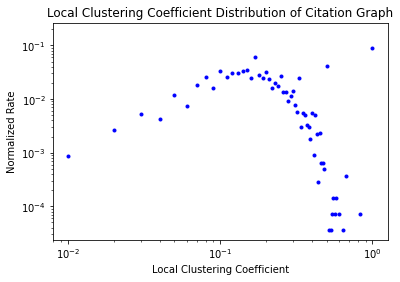

In [8]:
#find the normalized distribution
citation_distribution = clustering_coefficient_distribution(citation_graph)
normalized_citation_distribution = {}
for coefficient in citation_distribution:
    normalized_citation_distribution[coefficient] = citation_distribution[coefficient] / 27770.0

#create arrays for plotting
xdata = []
ydata = []
for coefficient in normalized_citation_distribution:
    xdata += [coefficient]
    ydata += [normalized_citation_distribution[coefficient]]

#plot degree distribution 
plt.xlabel('Local Clustering Coefficient')
plt.ylabel('Normalized Rate')
plt.title('Local Clustering Coefficient Distribution of Citation Graph')
plt.loglog(xdata, ydata, marker='.', linestyle='None', color='b')
#plt.savefig('citations.png')
plt.rcParams["figure.figsize"] = (10,10)

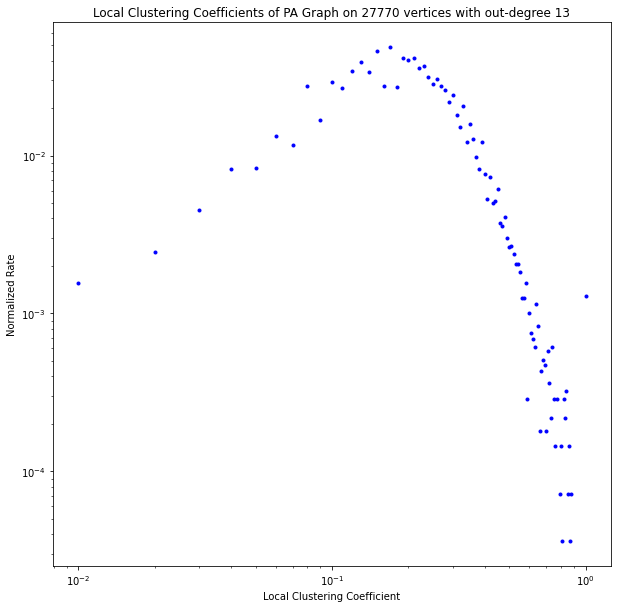

In [9]:
#find the normalized distribution
EX_DIST = clustering_coefficient_distribution(EX_GRAPH_PA1)
normalized_PA_distribution = {}
for coefficient in EX_DIST:
    normalized_PA_distribution[coefficient] = EX_DIST[coefficient]/27770.0
    
#plot the distribution
#create arrays for plotting
xdata = []
ydata = []
for coefficient in normalized_PA_distribution:
    xdata += [coefficient]
    ydata += [normalized_PA_distribution[coefficient]]

#clears plot
plt.clf()

#plot degree distribution 
plt.xlabel('Local Clustering Coefficient')
plt.ylabel('Normalized Rate')
plt.title('Local Clustering Coefficients of PA Graph on 27770 vertices with out-degree 13')
plt.loglog(xdata, ydata, marker='.', linestyle='None', color='b')
#plt.savefig('pa.png')
plt.rcParams["figure.figsize"] = (10,10)

<h3> Question 2 </h3>

In [10]:
def compute_in_degrees(digraph):
    """Takes a directed graph and computes the in-degrees for the nodes in the
    graph. Returns a dictionary with the same set of keys (nodes) and the
    values are the in-degrees."""
    #initialize in-degrees dictionary with zero values for all vertices
    in_degree = {}
        
    for vertex in digraph:
        in_degree[vertex] = 0
    #consider each vertex
    for vertex in digraph:
        #amend in_degree[w] for each outgoing edge from v to w
        for neighbour in digraph[vertex]:
            in_degree[neighbour] += 1
    return in_degree

In [11]:
in_degree0 = []
in_degree30 = []
in_degree60 = []
in_degree90 = []
num_added = [0]

#construct initial complete graph
PA_Graph = make_complete_graph(20)
trial = PATrial(20)
print("tracking progress...")

#adding vertices
for vertex in range(20, 10000):
    #progress tracker
    if vertex%1000 == 0:
        print(vertex)
    PA_Graph[vertex] = trial.run_trial(20)
    #add new in_degrees to relevant distributions
    in_degree = compute_in_degrees(PA_Graph)
    in_degree0.append(in_degree[0])
    if vertex>30:
        in_degree30.append(in_degree[30])
    if vertex>60:
        in_degree60.append(in_degree[60])
    if vertex>90:
        in_degree90.append(in_degree[90])
    if vertex!=20:
        num_added.append(num_added[-1]+1)


tracking progress...
1000
2000
3000
4000
5000
6000
7000
8000
9000


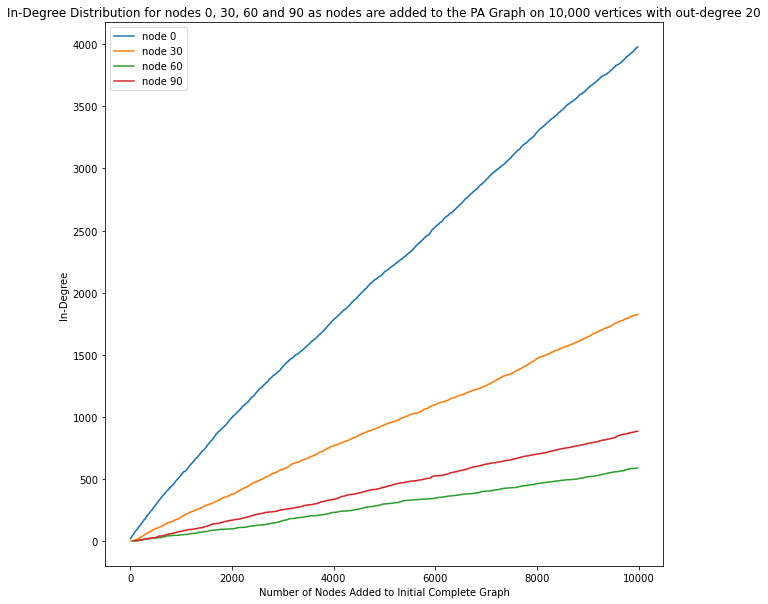

In [12]:
#plot degree distribution 
plt.xlabel('Number of Nodes Added to Initial Complete Graph')
plt.ylabel('In-Degree')
plt.title('In-Degree Distribution for nodes 0, 30, 60 and 90 as nodes are added to the PA Graph on 10,000 vertices with out-degree 20')

plt.plot(num_added, in_degree0, label = "node 0")
plt.plot(num_added[11:], in_degree30, label = "node 30")
plt.plot(num_added[41:], in_degree60, label = "node 60")
plt.plot(num_added[71:], in_degree90, label = "node 90")

# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

<p> You can see from the graph that the in-degree of each node increases linearly as more nodes are added to the graph. Node 0 always has a much higher in-degree than the other nodes due to it being part of the initial graph of 20 nodes, meaning it is more likely to gain more neighbours initially, which gives it an advantage over other nodes that are added later as it has a higher probability of gaining new links and increasing its in-degree. This is expected as node 0 starts off well-connected and the preferential attachment property makes new nodes more likely to connect to nodes that are well-connected. For nodes 30, 60 and 90, while their in-degrees do increase linearly, they fall well below that of node 0 as they do not start off well-connected and so are less likely to be connected to by new nodes according to the preferential attachment property. One interesting thing to note is that the order of nodes 30, 60 and 90 with respect to having the highest in-degree changes depending on which node is able to become better connected than the others early on. Whilst the nodes added first (30 or 60) have an advantage as there are more vertices to be added that could potentially connect to them, as the chances are far higher that new nodes will connect to one of the original nodes in the graph, they are unlikely to be well-connected by the time later nodes (60 or 90) are added and so it is not necessarily the case that nodes added earlier will have higher in-degrees as you may expect from a network that exhibits preferential attachment.</p>

<h3>Question 3</h3>

In [13]:
def in_degree_distribution(digraph):
    """Takes a directed graph and computes the unnormalized distribution of the
    in-degrees of the graph.  Returns a dictionary whose keys correspond to
    in-degrees of nodes in the graph and values are the number of nodes with
    that in-degree. In-degrees with no corresponding nodes in the graph are not
    included in the dictionary."""
    #find in_degrees
    in_degree = compute_in_degrees(digraph)
    #initialize dictionary for degree distribution
    degree_distribution = {}
    #consider each vertex
    for vertex in in_degree:
        #update degree_distribution
        if in_degree[vertex] in degree_distribution:
            degree_distribution[in_degree[vertex]] += 1
        else:
            degree_distribution[in_degree[vertex]] = 1
    return degree_distribution

In [14]:
def make_C_Graph(n,m,p):
    #construct initial complete graph on m nodes
    complete_graph = make_complete_graph(m)

    #add n-m futher nodes
    for vertex in range(m,n):
        complete_graph[vertex] = []
        #add m outgoing edges
        for node in range(m):
            #choose random existing vertex
            w = random.randint(0,vertex-1)
            #ensure no parallel edges
            if w in complete_graph[vertex]:
                pass
            else:
                #accept edge to w based on probability
                prob = random.uniform(0,1)
                if prob <= p:
                    complete_graph[vertex].append(w)
                else:
                    #choose neighbour of w
                    neighbour = random.choice(list(complete_graph[w]))
                    #ensure no parallel edges
                    if neighbour in complete_graph[vertex]:
                        pass
                    else:
                        complete_graph[vertex].append(neighbour)
        complete_graph[vertex] = set(complete_graph[vertex])
    return complete_graph

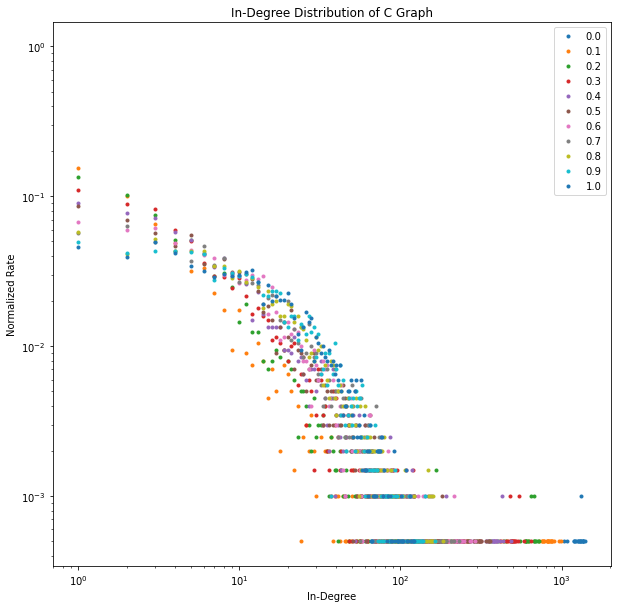

In [17]:
#set parameters
n=2000
m=20

in_degree_data = []
normalized_data = []
probabilities = []
local_clustering_data = []
normalized_clustering_data = []

#plotting in-degree and local clustering coefficient distributions for varying p
for prob in range(0,11):
    p = prob/10
    probabilities.append(p)
    C_graph = make_C_Graph(n,m,p)
    cgraph_degree_distribution = in_degree_distribution(C_graph)
    cgraph_clustering_distribution = clustering_coefficient_distribution(C_graph)
    normalized_cgraph_degree_distribution = {}
    for degree in cgraph_degree_distribution:
        normalized_cgraph_degree_distribution[degree] = cgraph_degree_distribution[degree] / n
    normalized_cgraph_clustering_distribution = {}
    for coeff in cgraph_clustering_distribution:
        normalized_cgraph_clustering_distribution[coeff] = cgraph_clustering_distribution[coeff] / n
        
    #create arrays for plotting
    xdata = []
    ydata = []
    for degree in normalized_cgraph_degree_distribution:
        xdata += [degree]
        ydata += [normalized_cgraph_degree_distribution[degree]]
    in_degree_data.append(xdata)
    normalized_data.append(ydata)
    
    clustering_xdata = []
    clustering_ydata = []
    for coeff in cgraph_clustering_distribution:
        clustering_xdata += [coeff]
        clustering_ydata += [normalized_cgraph_clustering_distribution[coeff]]
    local_clustering_data.append(clustering_xdata)
    normalized_clustering_data.append(clustering_ydata)
    
#plot degree distribution 
plt.xlabel('In-Degree')
plt.ylabel('Normalized Rate')
plt.title('In-Degree Distribution of C Graph')
for i in range(len(in_degree_data)):
    plt.plot(in_degree_data[i], normalized_data[i], marker='.', linestyle='None', label = probabilities[i])
plt.loglog()
# show a legend on the plot
plt.legend()
plt.rcParams["figure.figsize"] = (10,10)

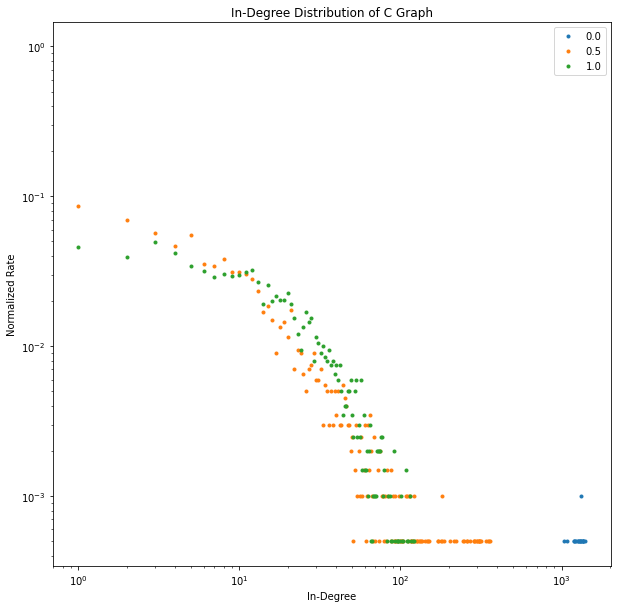

In [37]:
#plot simplified degree distribution 
plt.xlabel('In-Degree')
plt.ylabel('Normalized Rate')
plt.title('In-Degree Distribution of C Graph')
for i in range(len(in_degree_data)):
    if i in [0,5,10]:
        plt.plot(in_degree_data[i], normalized_data[i], marker='.', linestyle='None', label = probabilities[i])
plt.loglog()
# show a legend on the plot
plt.legend()
plt.rcParams["figure.figsize"] = (10,10)

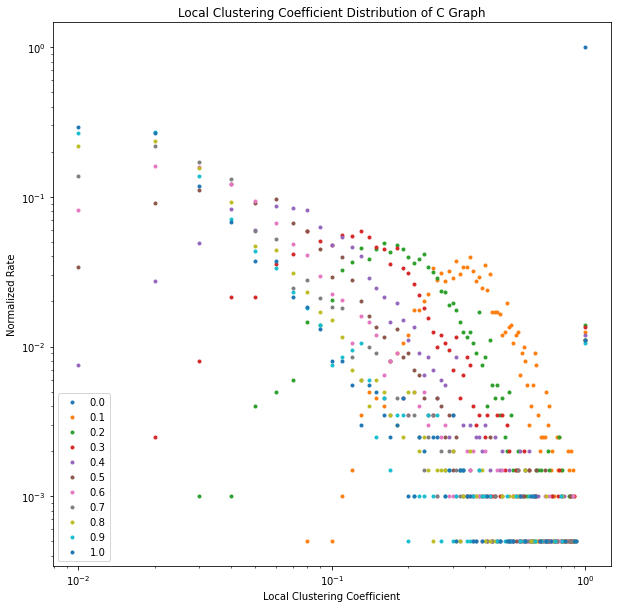

In [19]:
#plot local clustering coefficient distribution 
plt.xlabel('Local Clustering Coefficient')
plt.ylabel('Normalized Rate')
plt.title('Local Clustering Coefficient Distribution of C Graph')
for i in range(len(in_degree_data)):
    plt.plot(local_clustering_data[i], normalized_clustering_data[i], marker='.', linestyle='None', label = probabilities[i])
plt.loglog()
# show a legend on the plot
plt.legend()
plt.rcParams["figure.figsize"] = (10,10)

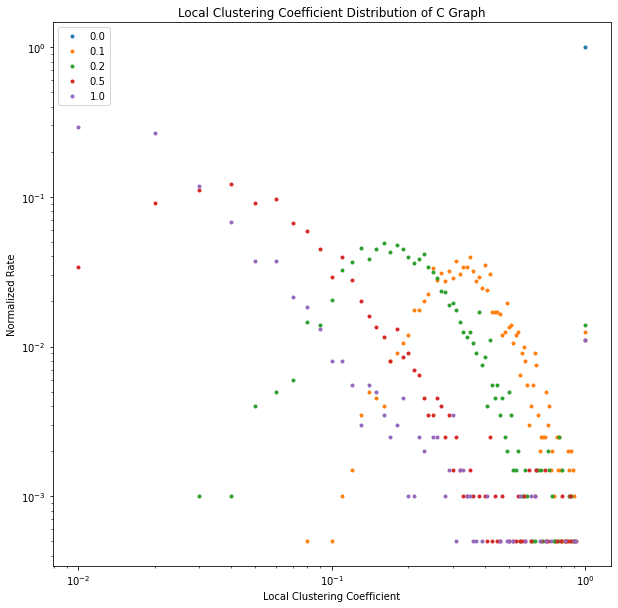

In [29]:
#plot simplified local clustering coefficient distribution 
plt.xlabel('Local Clustering Coefficient')
plt.ylabel('Normalized Rate')
plt.title('Local Clustering Coefficient Distribution of C Graph')
for i in range(len(in_degree_data)):
    if i in [0,1,2,5,10]:
        plt.plot(local_clustering_data[i], normalized_clustering_data[i], marker='.', linestyle='None', label = probabilities[i])
plt.loglog()
# show a legend on the plot
plt.legend()
plt.rcParams["figure.figsize"] = (10,10)

In [44]:
#investigating extreme values of p
C_graph = make_C_Graph(n,m,0)
for i in range(10):
    print(n-10+i,C_graph[n-10+i])

1990 {2, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 18}
1991 {1, 2, 6, 8, 9, 10, 11, 14, 16, 17, 18}
1992 {0, 1, 4, 5, 9, 10, 11, 12, 14, 16, 18, 19}
1993 {0, 1, 2, 3, 4, 5, 7, 8, 9, 11, 13, 14, 15, 16, 17, 18}
1994 {1, 3, 5, 8, 9, 10, 11, 12, 14, 15, 16, 18, 19}
1995 {0, 1, 3, 4, 5, 6, 10, 11, 12, 14, 15, 16, 17, 18, 19}
1996 {0, 2, 3, 5, 7, 8, 9, 10, 13, 15, 16, 18, 19}
1997 {4, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 19}
1998 {0, 2, 3, 5, 6, 8, 13, 15, 16, 18, 19}
1999 {0, 1, 3, 4, 6, 7, 8, 9, 12, 14, 15, 16, 18, 19}


In [45]:
#investigating extreme values of p
C_graph = make_C_Graph(n,m,1)
for i in range(10):
    print(n-10+i,C_graph[n-10+i])

1990 {1280, 128, 1, 15, 402, 22, 1058, 424, 436, 1716, 1477, 331, 1356, 1756, 996, 487, 493, 1908, 633, 765}
1991 {512, 391, 18, 274, 532, 1941, 792, 1564, 1194, 1324, 1969, 1855, 836, 199, 1608, 714, 78, 1235, 1503, 619}
1992 {1024, 1286, 1673, 1034, 1547, 31, 1057, 1446, 38, 171, 174, 689, 822, 1848, 1598, 574, 596, 106, 370, 1783}
1993 {1796, 1545, 905, 280, 1051, 667, 1067, 559, 1843, 313, 569, 71, 1867, 988, 477, 1510, 1259, 1137, 1277, 1918}
1994 {135, 1289, 1529, 1554, 1555, 1560, 1052, 938, 171, 306, 1464, 1485, 1240, 1499, 226, 1386, 107, 110, 1145, 893}
1995 {1408, 531, 1447, 1960, 1842, 1588, 1347, 587, 1613, 1103, 1360, 350, 1246, 1122, 359, 753, 373, 889, 506, 1535}
1996 {385, 515, 134, 1798, 908, 1300, 539, 552, 179, 1977, 64, 1873, 1624, 1248, 750, 1012, 629, 761, 1657, 254}
1997 {1668, 901, 774, 648, 1930, 1553, 928, 1192, 1086, 1472, 1225, 1610, 75, 337, 1882, 1639, 360, 109, 502, 1916}
1998 {768, 1793, 1281, 1675, 285, 1317, 679, 1974, 1213, 1227, 1102, 209, 210, 1619

<p>The in-degree distributions of the C graph show that for p=0 there is a small number of nodes with a high in-degree. This is because, as can be seen by the edges of nodes 1990 to 1999 above, when p=0 only neighbouring nodes of existing nodes are chosen, meaning that only nodes in the initial complete graph size m are linked to by new nodes. For the remaining values of p, increasing in increments of 0.1 up to 1, we see a more expected in-degree distribution, with the spread of unique in-degree values and the proportion of nodes with an in-degree of 1 decreasing as p increases. This is because smaller values of p mean a higher chance neighbours of random nodes will be selected, and so a small number of nodes will be selected more frequently than when p=1 and all existing nodes are selected with equal probability, hence the greater spread in unique high values of in-degree for smaller values of p. Smaller values of p also mean many nodes are likely to be selected only once as nodes are infrequently selected at random from the existing population.</p>

<p>The local clustering coefficients tell a similar story as for p=0, the local clustering coefficient is 1 for all nodes that have an in-degree>0 as these are the nodes that were in the original complete graph size m. Increasing p then creates curves where the curves for higher values of p have smaller median local clustering coefficients than lower values of p, in addition to being spread out over a greater range of local clustering coefficients. This is because lower values of p will give more edges to a smaller number of nodes as selecting neighbours of nodes is made more probable, and so a few nodes will be chosen many times, creating higher local clustering coefficients. On the other hand, higher values of p will select nodes mostly at random, which means there will be very little local clustering as there will be links spread all over the network.</p>

<p>It should be noted that all C graphs will have many links to the original m nodes, partly as they appear as neighbours more often than other nodes, and partly because new nodes always choose from the existing nodes, and so it is likely that they will be selected more often as they appear earlier than other nodes. This is why a C graph with p=1 is not the same as a random graph, even though nodes to link to will always be selected randomly.</p>

<p>For a value of p at around 0.4, we can see that the C graph is not too dissimilar to the local clustering coefficient distribution for the PA graph in question 1. This is because C graphs exhibit a similar property to preferential attachment as there is a 1-p chance that a neighbour of a random node will be chosen, and neighbouring nodes are more likely to be well-connected as they will be selected more often than random nodes depending on p. Therefore at p=4 and below we see nodes that are likely well-connected having a better chance of being chosen for new nodes to form links with, which is a version of the preferential attachment property.</p>

<p>C graphs can provide an intuitive model for some networks depending on p, for example in some social networks, a user may form links with (like, follow...) some popular users such as celebrities, which is modelled by the 1-p chance of linking to a neighbour of a random node, as many random nodes form links with popular users. However, the user may also form links with their friends who do not have many links, which is modelled by the p chance of picking a random node, although this would not model the local clustering that groups of friends often create.</p>